## Average order value (Nyckeltal)
- Total **intäkt** och totalt **antal enheter**. (Azar)
- **AOV** (Average Order Value) (Ali)
- **Intäkt per kategori**. (Carina)
- **Intäkt per stad**. (Vera)
- **Top-3 kategorier** efter intäkt.


In [3]:
from src.io_utils import load_data                                          #importing load_data function from io_utils file
from src.metrics import calculating_revenue_city, calculate_category_rev, calculate_average_order_value    #importing calculating_revenue_city,  calculate_category_rev functions from metrics file

df = load_data("data/ecommerce_sales.csv")                                  #loading the data from ecommerce_sales.csv file

## Calculating revenue by city

numbers = calculating_revenue_city(df)                                      #calling the calculating_revenue_city function and storing the result in numbers variable
print(numbers)                                                              #printing the numbers variable  

## Calculating revenue by category

category_revenue = calculate_category_rev(df)                               #calling the calculate_category_rev function and storing the result in category_revenue variable
print()                                                                     #printing a blank line for better readability    
print(category_revenue)                                                     #printing the category_revenue variable 

## Calculating average order value

average_order_value, _  = calculate_average_order_value(df)                  #calling the calculate_average_order_value function and storing the first returned value in average_order_value variable
print()                                                                     #printing a blank line for better readability    
print(f"The Average Order Value is: {average_order_value:.2f} kr")          #printing the average_order_value variable with a message

        city     revenue
0  Stockholm  1227201.94
1   Göteborg   859019.65
2      Malmö   567926.32
3    Uppsala   551478.42
4   Västerås   297140.90

      category     revenue
2  Electronics  1364228.07
4       Sports   734653.42
1     Clothing   586744.91
3         Home   511070.87
0       Beauty   163053.97
5         Toys   143015.99

The Average Order Value is: 1401.11 kr


## visualisering_1
Intäkt per kategori. Vi behöver följande för att rita visualisering som visar Intäkt per kategori.

1. funktion som kalkylerar Intäkt per kategori: calculate_category_rev
2. plot 'function' from viz.py --> bar chart = plot.bar()
3. we get our data from ecommerce_sales.csv with the help of io_utils. I believe keeping visuals in a seperate py file is better so far.
4. plot_revenue_by_category(revenue_by_category) displays the visual

      category     revenue
2  Electronics  1364228.07
4       Sports   734653.42
1     Clothing   586744.91
3         Home   511070.87
0       Beauty   163053.97
5         Toys   143015.99


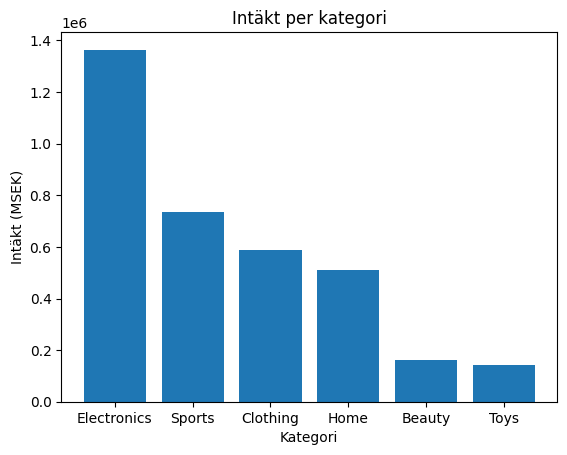

In [4]:
from src.io_utils import load_data                                  # when Kernel restarted, this import must be done. importing load_data function from io_utils file         
from src.metrics import calculate_category_rev
from src.viz import plot_revenue_by_category                        #importing plot_revenue_by_category function from viz file


df = load_data("data/ecommerce_sales.csv")                          #loading the data from ecommerce_sales.csv file   
revenue_by_category = calculate_category_rev(df)  #                 #calling the calculate_category_rev function and storing the result in revenue_by_category variable
print(revenue_by_category)                                          #printing the revenue_by_category variable

revenue_by_category = revenue_by_category.reset_index(drop=True)    #resetting the index of revenue_by_category DataFrame

plot_revenue_by_category(revenue_by_category)                       #calling the plot_revenue_by_category function to plot the revenue by category



## Visualisering_2
Försäljning över tid -> linje/månadsvis 

     month    revenue
0  2024-01  664083.32
1  2024-02  548462.03
2  2024-03  487602.00
3  2024-04  580194.83
4  2024-05  632165.16
5  2024-06  590259.89


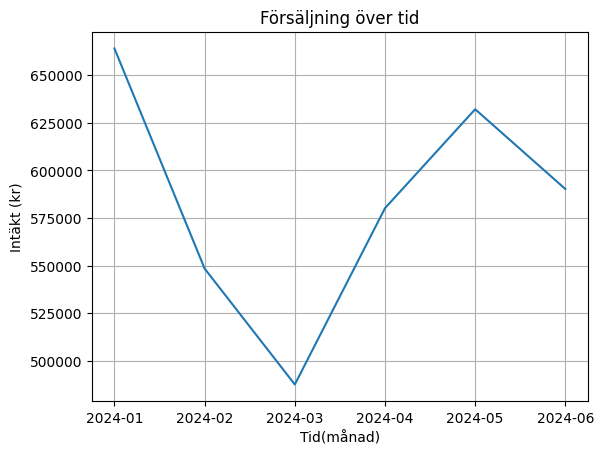

In [5]:
from src.io_utils import load_data                              #imports load data. make sure Kernel restarted, this import must be done
from src.metrics import calculate_revenue_by_month              #bring in the calculation function
from src.viz import plot_revenue_by_month                       #bring in the plot function

df = load_data("data/ecommerce_sales.csv")                      #load the data  
revenue_by_month = calculate_revenue_by_month(df)               #run the calculation function
print(revenue_by_month)                                         #print the result   

revenue_by_month = revenue_by_month.reset_index(drop=True)      #reset the index for better plotting      ???????? what is worse plotting

plot_revenue_by_month(revenue_by_month)                         #run the plot function

## Visualisering 3
Försäljning över tid, grouped by categories




      month     category    revenue
0   2024-01       Beauty   36266.24
1   2024-01     Clothing  105282.27
2   2024-01  Electronics  320974.28
3   2024-01         Home   65401.53
4   2024-01       Sports  117601.32
5   2024-01         Toys   18557.68
6   2024-02       Beauty   17229.40
7   2024-02     Clothing   75706.91
8   2024-02  Electronics  294814.45
9   2024-02         Home   66959.10
10  2024-02       Sports   68657.21
11  2024-02         Toys   25094.96
12  2024-03       Beauty   29048.02
13  2024-03     Clothing   75064.45
14  2024-03  Electronics  171967.59
15  2024-03         Home   81303.43
16  2024-03       Sports  104392.21
17  2024-03         Toys   25826.30
18  2024-04       Beauty   21218.72
19  2024-04     Clothing  121692.91
20  2024-04  Electronics  167009.99
21  2024-04         Home   97208.29
22  2024-04       Sports  141835.03
23  2024-04         Toys   31229.89
24  2024-05       Beauty   26728.58
25  2024-05     Clothing  116598.19
26  2024-05  Electronics  19

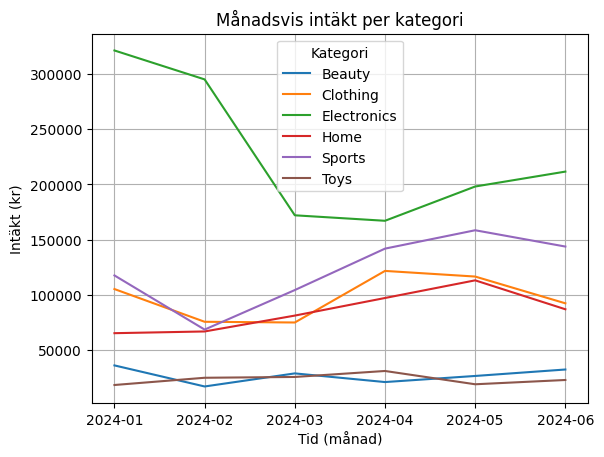

In [6]:
from src.io_utils import load_data                                                  #import and load data. make sure Kernel restarted, this import must be done
from src.metrics import calculate_monthly_category_revenue                          #bring in the calculation function for each category over time
from src.viz import plot_monthly_category_revenue                                   #bring in the plot function for each category over time

df = load_data("data/ecommerce_sales.csv")                                          #load the data. needs to be run for the sake of our assignments' jupyter notebook. We won't need it after creating EcommerceAnalyzer class.


monthly_category_revenue = calculate_monthly_category_revenue(df)               #run the calculation function (monthly_category_revenue)????? create a new funtion in metrics.py file for each category over time
print(monthly_category_revenue)                                                 #print the result   

# monthly_category_revenue = monthly_category_revenue.reset_index(drop=True)      #reset the index for better plotting      ???????? what is worse plotting

plot_monthly_category_revenue(monthly_category_revenue)                         #run the plot function